In [1]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('Home.csv')

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51


In [4]:
train.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [5]:
train['use [kW]'].unique()

array([0.93283333, 0.93433333, 0.93181667, ..., 1.9344    , 1.55181667,
       1.92426667])

In [6]:

train.loc[train['use [kW]']>= 1, 'use [kW]'] = 1
train.loc[train['use [kW]']<1, 'use [kW]'] = 0
 

In [7]:
train['use [kW]'].unique()

array([0., 1.])

In [8]:
train[train['use [kW]']==0].shape

(384502, 32)

In [9]:
train[train['use [kW]']==1].shape

(119408, 32)

In [10]:
train

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.0,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
1,1451624401,0.0,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
2,1451624402,0.0,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
3,1451624403,1.0,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
4,1451624404,1.0,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1452128305,1.0,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51
503906,1452128306,1.0,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51
503907,1452128307,1.0,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51
503908,1452128308,1.0,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186,0.0101,31.27,0.51


In [11]:
train.dtypes


time                     int64
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing              int64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [12]:
df = pd.DataFrame(train)
df.to_csv (r'C:/Users/dell/Downloads/design/Baker/upload.csv', index = False, header=True)

In [13]:
y_train=train['use [kW]']

In [14]:
train.drop(columns=['time','use [kW]','icon','cloudCover','summary','Furnace 2 [kW]','Kitchen 38 [kW]','Kitchen 14 [kW]','dewPoint','precipProbability'],inplace=True)

In [15]:
train.dtypes

use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
humidity               float64
visibility             float64
apparentTemperature    float64
pressure               float64
windSpeed              float64
windBearing              int64
precipIntensity        float64
dtype: object

In [16]:
df = pd.DataFrame(train)
df.to_csv (r'C:/Users/dell/Downloads/design/Baker/test.csv', index = False, header=True)

In [16]:
x_train= train

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(352737, 22)
(151173, 22)


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:


classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [20]:
classifier.score(X_train,y_train)

1.0

In [21]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test )
accuracy_score(y_pred,y_test)

1.0

In [22]:
import sklearn.metrics

In [23]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    115401
         1.0       1.00      1.00      1.00     35772

    accuracy                           1.00    151173
   macro avg       1.00      1.00      1.00    151173
weighted avg       1.00      1.00      1.00    151173



In [24]:
y_pred = classifier.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[115401,      0],
       [     0,  35772]], dtype=int64)

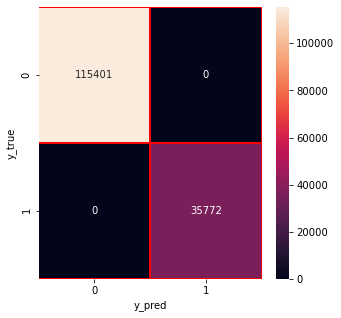

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [26]:
import pickle

pickle.dump(classifier,open('spam.pkl','wb'))


In [27]:
model = pickle.load(open('spam.pkl', 'rb'))
print(model)

RandomForestClassifier(n_estimators=10, random_state=0)
